**About the dataset**

Context Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions for feeding the growing world population has become a hot topic for food and agriculture organizations, entrepreneurs and philanthropists. These solutions range from changing the way we grow our food to changing the way we eat. To make things harder, the world's climate is changing and it is both affecting and affected by the way we grow our food – agriculture. This dataset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals.

Content The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

Food - refers to the total amount of the food item available as human food during the reference period. Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period. Dataset's attributes:

Area code - Country name abbreviation Area - County name Item - Food item Element - Food or Feed Latitude - geographic coordinate that specifies the north–south position of a point on the Earth's surface Longitude - geographic coordinate that specifies the east-west position of a point on the Earth's surface Production per year - Amount of food item produced in 1000 tonnes

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
df = pd.read_csv('../input/FAO.csv', encoding = "ISO-8859-1")

In [98]:
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


**Plot for annual produce of different countries with quantity in y-axis and years in x-axis**

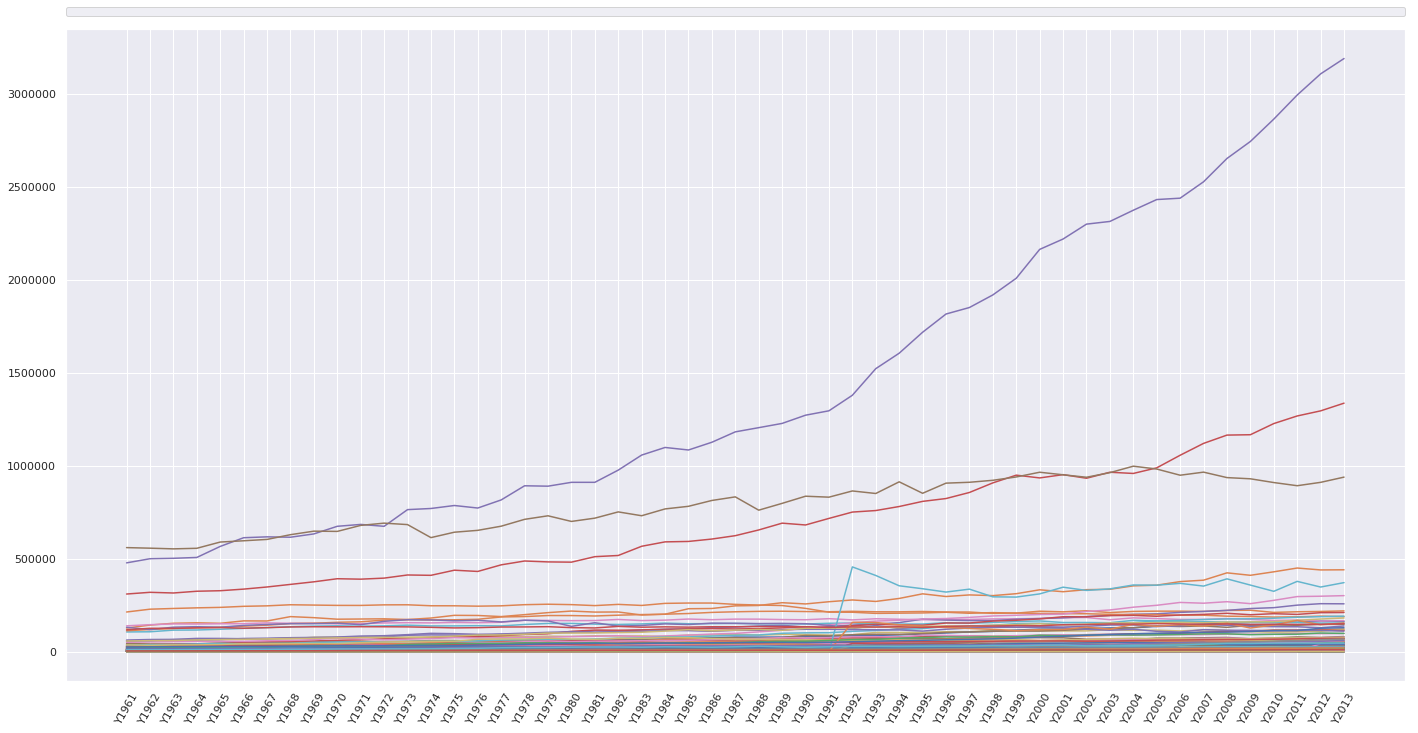

In [99]:
area_list = list(df['Area'].unique())
year_list = list(df.iloc[:,10:].columns)

plt.figure(figsize=(24,12))
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area'] == ar].sum())
    plt.plot(yearly_produce)
plt.xticks(np.arange(53), tuple(year_list), rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=8, mode="expand", borderaxespad=0.)
plt.savefig('p.png')
plt.show()

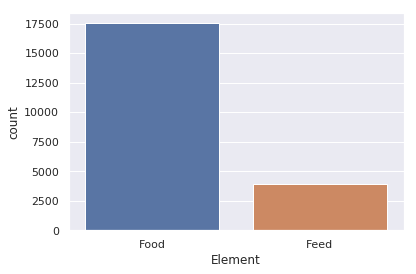

In [100]:
sns.set()
sns.countplot(df['Element'])

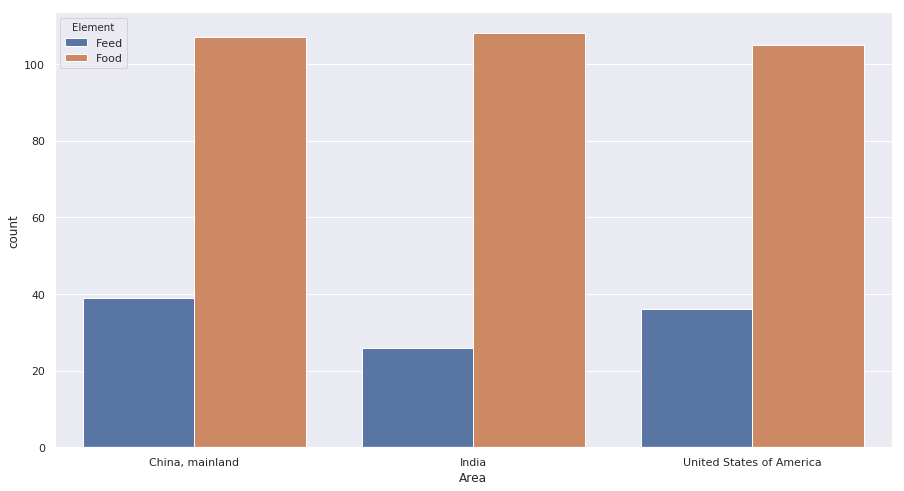

In [101]:
plt.figure(figsize=(15,8))
sns.set()
sns.countplot('Area',data=df[(df['Area'] == "India") | (df['Area'] == "China, mainland") | (df['Area'] == "United States of America")], hue='Element')

In [102]:
df2 = df.copy()
df2 = pd.DataFrame(df2.groupby('Area').sum())
df2.drop(['Area Code','Item Code','Element Code','latitude','longitude'], axis=1, inplace=True)
df2['total'] = df2.sum(axis=1)
df2['Rank'] = df2['total'].rank(ascending=False)
#Re-order the dataframe by sorting the values
df2.sort_values(by='Rank', ascending=True).head(10)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total,Rank
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, mainland",477279.0,499497.0,501795.0,506368.0,565759.0,612557.0,617260.0,615253.0,633064.0,674036.0,684128.0,673971.0,763734.0,769853.0,785904.0,772309.0,815901.0,892054.0,889964.0,910616.0,910636.0,976332.0,1057279.0,1098250.0,1084674.0,1126328.0,1182204.0,1204810.0,1227666.0,1271885.0,1295563.0,1379165.0,1522331.0,1605487.0,1718202.0,1816327.0,1851318.0,1919109.0,2008790.0,2164099.0,2219943.0,2300071.0,2314540.0,2374847.0,2432309.0,2439722.0,2527905.0,2653346.0,2744815.0,2865116.0,2994756.0,3108577,3191155,76248859.0,1.0
United States of America,559347.0,556319.0,552630.0,555677.0,589288.0,596129.0,603444.0,628936.0,647869.0,646576.0,678905.0,691014.0,683179.0,613150.0,642217.0,652239.0,674580.0,711429.0,730542.0,700241.0,717866.0,751515.0,730857.0,767510.0,781596.0,813060.0,832334.0,760821.0,797454.0,835926.0,830811.0,864199.0,850575.0,913340.0,851713.0,906255.0,910904.0,921577.0,939541.0,964963.0,951203.0,937972.0,962709.0,997495.0,982124.0,948891.0,965464.0,936095.0,929625.0,909478.0,892416.0,910537,938639,41719176.0,2.0
India,309565.0,318802.0,315155.0,324564.0,327376.0,336008.0,347493.0,361409.0,375288.0,391899.0,389532.0,395202.0,412069.0,410204.0,437783.0,431078.0,466611.0,487270.0,482421.0,481055.0,510580.0,516968.0,566543.0,590201.0,592570.0,605447.0,623575.0,654356.0,690928.0,681169.0,716474.0,750584.0,758811.0,780455.0,808109.0,823412.0,856044.0,907653.0,949204.0,934346.0,951943.0,932637.0,964933.0,958430.0,988532.0,1056344.0,1120149.0,1164815.0,1166783.0,1226850.0,1267739.0,1295189,1336593,36549150.0,3.0
Brazil,126501.0,142536.0,152178.0,154698.0,152060.0,165022.0,164557.0,188016.0,182424.0,174144.0,175109.0,176177.0,172396.0,180358.0,194890.0,194142.0,188157.0,198661.0,209478.0,217920.0,212337.0,213009.0,196580.0,200957.0,230484.0,231731.0,245937.0,247874.0,262938.0,256259.0,268171.0,277632.0,269658.0,285793.0,310646.0,296138.0,304748.0,301059.0,311399.0,332274.0,322017.0,333042.0,335122.0,353635.0,357158.0,376499.0,384071.0,423546.0,410338.0,429110.0,449439.0,439247,439967,13818239.0,4.0
Germany,212839.0,227999.0,231823.0,235210.0,237710.0,243387.0,245982.0,251853.0,250111.0,248459.0,248245.0,251301.0,251675.0,246416.0,246264.0,244250.0,246085.0,252256.0,254707.0,252512.0,247250.0,253859.0,248158.0,259239.0,261098.0,261008.0,253840.0,250380.0,247612.0,232351.0,211866.0,211566.0,205382.0,206518.0,207780.0,211402.0,205932.0,209584.0,206727.0,217063.0,213744.0,219432.0,209830.0,215978.0,217398.0,217313.0,215849.0,221273.0,222413.0,210659.0,214165.0,215798,218891,12300442.0,5.0
Japan,112141.0,118634.0,123890.0,128280.0,130402.0,136702.0,141982.0,150584.0,152284.0,157492.0,160078.0,169255.0,171746.0,170107.0,171067.0,173686.0,186191.0,188258.0,193863.0,193640.0,191432.0,195715.0,199038.0,201082.0,204677.0,210728.0,214059.0,216262.0,216975.0,215299.0,214289.0,216494.0,214086.0,213836.0,215630.0,212967.0,212604.0,205237.0,207324.0,205273.0,203979.0,203459.0,200301.0,199021.0,199075.0,195615.0,195712.0,190337.0,188600.0,185552.0,186917.0,190471,188113,9840441.0,6.0
France,138385.0,144629.0,148715.0,148058.0,149521.0,150033.0,154228.0,152189.0,152679.0,149263.0,150042.0,153887.0,155387.0,154211.0,156658.0,155198.0,157720.0,168337.0,167647.0,166305.0,166961.0,172657.0,166725.0,169075.0,174988.0,171411.0,174622.0,174433.0,172111.0,171107.0,176966.0,170332.0,176487.0,173802.0,171303.0,172085.0,172722.0,175638.0,176283.0,178239.0,182113.0,183302.0,171211.0,181238.0,177327.0,172824.0,172974.0,177453.0,172872.0,167332.0,169166.0,164096,166079,8789026.0,7.0
Italy,105534.0,106405.0,115344.0,115971.0,119997.0,124751.0,128973.0,133473.0,13

** Create two new columns, one is the sum of each row and one is the ranking** 

**Create another dataframe with item names as index** 

In [135]:
df3 = df.copy()
df3 = pd.DataFrame(df3.groupby('Item').sum())
df3.drop(['Area Code','Item Code','Element Code','latitude','longitude'], axis=1, inplace=True)
df3['total'] = df3.sum(axis=1)
df3['Rank'] = df3['total'].rank(ascending=False)
#Re-order the dataframe by sorting the values
df3.sort_values(by='Rank', ascending=True).head(10)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total,Rank
Item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cereals - Excluding Beer,588894.0,611825.0,630487.0,651402.0,682604.0,708781.0,727698.0,747534.0,776142.0,803833.0,833010.0,849840.0,882063.0,857803.0,894326.0,898114.0,933244.0,993188.0,1017360.0,1027055.0,1048177.0,1086692.0,1112146.0,1149727.0,1149355.0,1176479.0,1196432.0,1181280.0,1213854.0,1224232.0,1235110.0,1447777.0,1462856.0,1489635.0,1482674.0,1525207.0,1535488.0,1546571.0,1554199.0,1589972.0,1616331.0,1611455.0,1621879.0,1669731.0,1674129.0,1678707.0,1706244.0,1778904.0,1737755.0,1750798.0,1804488.0,1808225,1902569,64884281.0,1.0
Milk - Excluding Butter,500986.0,503530.0,511170.0,518616.0,524636.0,536156.0,541360.0,555348.0,564908.0,560902.0,561636.0,576518.0,584914.0,587536.0,593180.0,614318.0,627476.0,647378.0,664188.0,671352.0,675046.0,685216.0,711970.0,732564.0,743524.0,748810.0,760532.0,760404.0,765800.0,778250.0,779982.0,969952.0,977068.0,985404.0,1002714.0,1008744.0,1015762.0,1028030.0,1053574.0,1065530.0,1087212.0,1117290.0,1140138.0,1159622.0,1190382.0,1229212.0,1262878.0,1283666.0,1305576.0,1336422.0,1370168.0,1413148,1423422,45014120.0,2.0
Vegetables,179658.0,178938.0,179717.0,177356.0,182315.0,188422.0,192242.0,199947.0,203312.0,199089.0,208618.0,206011.0,213627.0,220476.0,229758.0,229185.0,238973.0,252083.0,259014.0,255932.0,269328.0,284236.0,289735.0,311639.0,324350.0,343690.0,354460.0,362584.0,372074.0,384057.0,385540.0,436528.0,462119.0,483456.0,511235.0,542969.0,555329.0,582230.0,636267.0,705835.0,731647.0,755876.0,783017.0,791599.0,812355.0,843601.0,869257.0,898452.0,921715.0,950541.0,981219.0,1013621,1034682,24179916.0,3.0
Starchy Roots,282832.0,288066.0,292242.0,292892.0,309363.0,325298.0,328907.0,336308.0,341106.0,357513.0,340157.0,340956.0,370152.0,365091.0,365046.0,354827.0,372991.0,390903.0,377450.0,357727.0,359729.0,364621.0,361357.0,376465.0,371818.0,367516.0,381941.0,381603.0,382830.0,394038.0,392804.0,447874.0,483518.0,466435.0,478752.0,494236.0,486740.0,503980.0,521703.0,541172.0,538152.0,542121.0,544555.0,570581.0,562267.0,542734.0,549618.0,551926.0,555677.0,572028.0,602338.0,611923,618650,22711529.0,4.0
Maize and products,168039.0,168305.0,172905.0,175468.0,190304.0,200860.0,213050.0,215613.0,221953.0,226232.0,238638.0,251871.0,261893.0,243819.0,264376.0,269940.0,277601.0,304501.0,323106.0,328668.0,324825.0,333730.0,323991.0,335023.0,322249.0,344875.0,351962.0,338042.0,356443.0,360056.0,373551.0,416329.0,420184.0,441087.0,439297.0,461475.0,471862.0,473702.0,486020.0,499465.0,507646.0,508253.0,524364.0,545024.0,549036.0,543280.0,573892.0,592231.0,557940.0,584337.0,603297.0,608730,671300,19960640.0,5.0
Wheat and products,138829.0,144643.0,147325.0,156273.0,168822.0,169832.0,171469.0,179530.0,189658.0,195255.0,201783.0,214205.0,217275.0,217451.0,220283.0,224956.0,240862.0,257776.0,264343.0,273692.0,283382.0,294800.0,317155.0,330878.0,338196.0,348437.0,356153.0,354596.0,359585.0,363778.0,380724.0,469016.0,473295.0,476036.0,476066.0,480911.0,488600.0,505035.0,498511.0,512675.0,527271.0,522973.0,504451.0,527394.0,532263.0,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597,587492,19194671.0,6.0
"Vegetables, Other",147094.0,144595.0,146385.0,142942.0,146929.0,151774.0,154146.0,159531.0,162654.0,158277.0,166024.0,163275.0,168598.0,172348.0,178391.0,180337.0,186605.0,196914.0,200616.0,198718.0,210961.0,221585.0,225174.0,243176.0,252967.0,271862.0,280628.0,286231.0,290621.0,298540.0,299889.0,338998.0,362182.0,377765.0,399413.0,425097.0,440214.0,458688.0,497577.0,564140.0,590474.0,607234.0,627762.0,622915.0,640267.0,666819.0,682087.0,707525.0,717882.0,745438.0,766225.0,794960,811496,19052945.0,7.0
Rice (

**plot a heatmap of correlation of produce in difference years**

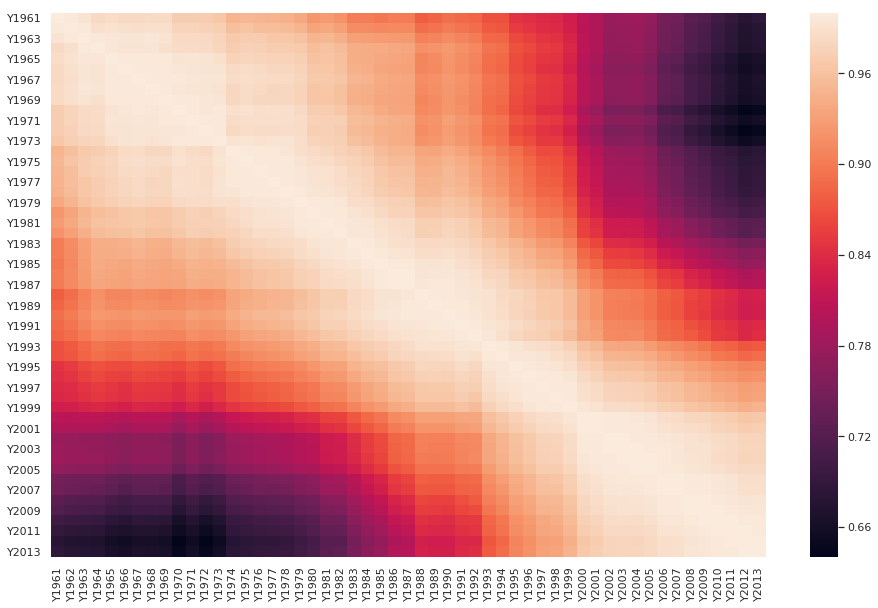

In [105]:
year_df = df.iloc[:,10:]
plt.figure(figsize=(16,10))
sns.heatmap(year_df.corr())

**Food and feed plot for most produced items**


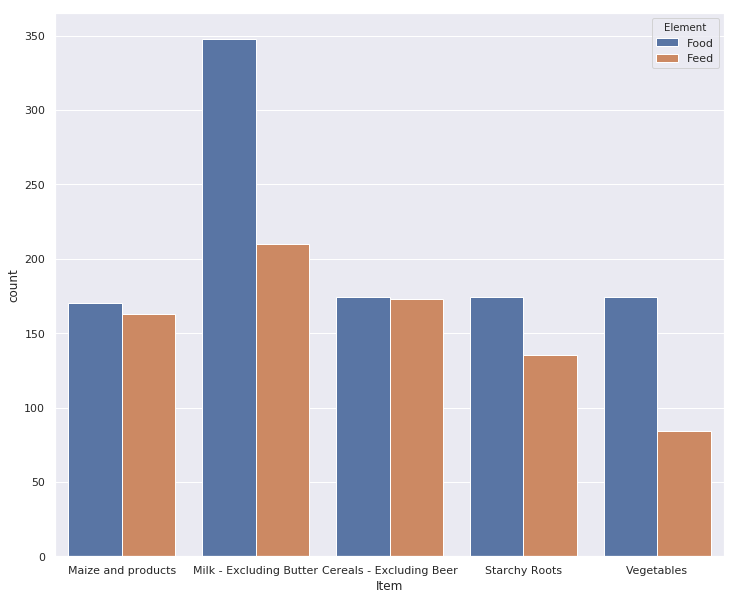

In [106]:
plt.figure(figsize=(12,10))
sns.countplot('Item', 
              data = df[(df['Item'] == 'Cereals - Excluding Beer') | (df['Item'] == 'Milk - Excluding Butter') | (df['Item'] == 'Vegetables') | 
                        (df['Item'] == 'Starchy Roots') | (df['Item'] == 'Maize and products')],
              hue = df['Element']
             )

**Heatmap of production of food items over years**

This will detect the items whose production has drastically increased over the years


In [139]:
df4 = df3.drop(['total', 'Rank'], axis=1)

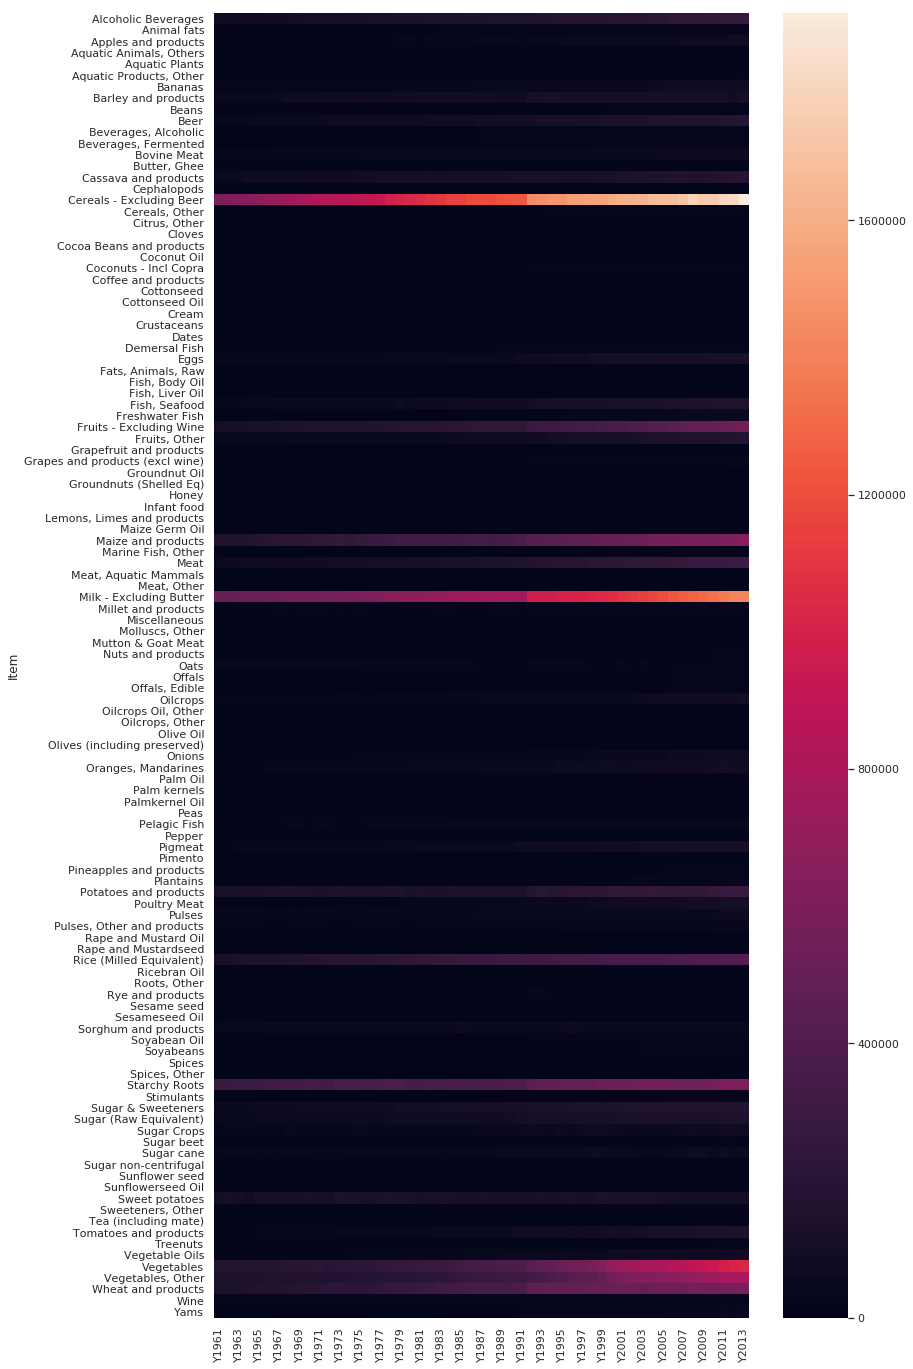

In [142]:
fig, ax = plt.subplots(figsize=(12,24))
sns.heatmap(df4, ax=ax)
ax.set_yticklabels(df4.index)
plt.show()

In [143]:
df3.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total,Rank
Item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverages,69924.0,72447.0,75105.0,77976.0,80127.0,83660.0,86095.0,89075.0,92729.0,97789.0,101022.0,103738.0,109857.0,113280.0,116337.0,119972.0,122155.0,124906.0,129259.0,131978.0,132496.0,135148.0,135495.0,135136.0,137374.0,141380.0,146596.0,149054.0,151128.0,151795.0,155712.0,167353.0,171162.0,174872.0,179655.0,179189.0,185364.0,186749.0,190468.0,196329.0,203000.0,204629.0,206401.0,217392.0,222722.0,233310.0,244420.0,244373.0,243452.0,247414.0,256269.0,258895,260701,8242864.0,12.0
Animal fats,10359.0,10929.0,11116.0,11361.0,11469.0,11508.0,11974.0,12325.0,12263.0,12312.0,12558.0,12683.0,11954.0,12411.0,13009.0,13174.0,13392.0,13890.0,14228.0,14529.0,14624.0,14605.0,14950.0,15240.0,15745.0,15661.0,15885.0,16062.0,16339.0,16407.0,16188.0,19939.0,20219.0,20255.0,19950.0,19526.0,19635.0,19865.0,20912.0,21851.0,21438.0,22321.0,22457.0,22781.0,22641.0,23314.0,23807.0,23818.0,23900.0,24267.0,24604.0,25137,25186,906973.0,43.0
Apples and products,10833.0,13110.0,14034.0,14509.0,13692.0,14176.0,16336.0,16587.0,17951.0,17106.0,17212.0,16292.0,18097.0,17555.0,19341.0,18977.0,18767.0,20697.0,22631.0,22488.0,22086.0,24407.0,26437.0,26828.0,27637.0,28998.0,30196.0,30999.0,30183.0,31542.0,28171.0,37389.0,39856.0,40690.0,42266.0,46386.0,47192.0,47184.0,48081.0,50315.0,49130.0,48049.0,50298.0,53749.0,55468.0,57909.0,59699.0,60956.0,61415.0,62436.0,64886.0,68851,71334,1811414.0,34.0
"Aquatic Animals, Others",39.0,39.0,41.0,45.0,49.0,105.0,100.0,117.0,117.0,191.0,169.0,170.0,311.0,208.0,203.0,214.0,285.0,267.0,349.0,184.0,152.0,224.0,321.0,178.0,220.0,231.0,224.0,228.0,254.0,223.0,278.0,414.0,259.0,333.0,416.0,463.0,615.0,650.0,640.0,682.0,620.0,604.0,881.0,820.0,936.0,1012.0,979.0,1277.0,1322.0,1340.0,1382.0,1240,1249,23870.0,107.0
Aquatic Plants,502.0,581.0,577.0,619.0,699.0,787.0,837.0,833.0,940.0,857.0,1038.0,1226.0,1127.0,1400.0,1360.0,1410.0,1948.0,1982.0,1888.0,2070.0,2007.0,1936.0,2190.0,2363.0,2378.0,2481.0,2063.0,2493.0,2709.0,2562.0,3270.0,4365.0,5131.0,5630.0,5509.0,5681.0,5750.0,6800.0,7624.0,8002.0,8262.0,9020.0,9752.0,10726.0,10853.0,11031.0,11352.0,11710.0,12130.0,12767.0,13367.0,14508,14619,253722.0,78.0


**Scaling the data**

In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(df3.drop(['total', 'Rank'], axis=1)))
X.columns=['Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013']

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,0.486369,0.495765,0.507321,0.521386,0.512911,0.519198,0.526987,0.530932,0.543226,0.570774,0.584939,0.593701,0.613993,0.655321,0.652939,0.675513,0.657990,0.628438,0.642135,0.659887,0.646337,0.635428,0.616164,0.578943,0.586408,0.593230,0.606038,0.624462,0.616251,0.606804,0.622894,0.542011,0.542998,0.546932,0.560275,0.533194,0.553595,0.546005,0.541651,0.538043,0.552902,0.549047,0.543712,0.567879,0.579303,0.609685,0.634206,0.602650,0.599989,0.597116,0.600698,0.593729,0.571143
1,-0.247685,-0.245777,-0.246648,-0.246493,-0.249461,-0.254639,-0.251836,-0.254420,-0.257110,-0.259626,-0.258308,-0.256564,-0.267938,-0.267719,-0.264621,-0.263471,-0.264837,-0.264359,-0.263589,-0.259492,-0.261893,-0.264853,-0.262810,-0.265796,-0.266119,-0.268829,-0.272777,-0.275499,-0.276452,-0.278176,-0.281319,-0.268527,-0.272317,-0.275461,-0.281749,-0.286590,-0.289147,-0.290448,-0.290744,-0.290314,-0.292650,-0.291288,-0.292814,-0.295683,-0.297993,-0.297902,-0.299068,-0.300315,-0.302527,-0.303845,-0.306368,-0.306299,-0.306809
2,-0.241844,-0.219487,-0.212266,-0.210205,-0.224777,-0.226024,-0.206003,-0.210809,-0.200536,-0.213053,-0.213946,-0.222863,-0.212601,-0.220647,-0.208392,-0.212450,-0.219231,-0.209617,-0.197426,-0.197189,-0.204396,-0.191647,-0.179051,-0.184152,-0.182765,-0.177377,-0.176559,-0.174420,-0.184763,-0.179244,-0.203661,-0.172580,-0.166248,-0.166769,-0.164090,-0.148679,-0.149018,-0.153521,-0.157364,-0.155178,-0.163686,-0.172696,-0.166201,-0.158266,-0.154057,-0.148385,-0.147232,-0.148270,-0.148313,-0.149737,-0.148647,-0.137989,-0.134779
3,-0.374865,-0.377045,-0.377143,-0.376934,-0.376268,-0.376937,-0.376602,-0.379340,-0.377917,-0.377381,-0.376401,-0.373409,-0.372821,-0.379387,-0.378339,-0.377417,-0.376046,-0.373916,-0.372868,-0.371783,-0.373403,-0.372258,-0.369480,-0.371917,-0.374938,-0.374633,-0.378071,-0.382649,-0.382982,-0.383964,-0.384427,-0.375883,-0.380130,-0.381424,-0.384739,-0.384469,-0.385865,-0.386757,-0.390265,-0.390817,-0.389601,-0.391391,-0.390936,-0.393132,-0.393163,-0.394289,-0.395639,-0.392599,-0.395339,-0.396414,-0.397291,-0.398309,-0.396041
4,-0.369159,-0.370512,-0.370827,-0.370317,-0.369050,-0.369622,-0.368858,-0.372013,-0.369732,-0.370911,-0.368118,-0.363548,-0.365470,-0.368479,-0.368065,-0.366902,-0.361936,-0.360124,-0.360750,-0.357019,-0.359109,-0.359472,-0.355852,-0.356522,-0.359812,-0.359204,-0.365707,-0.367321,-0.366723,-0.368675,-0.365036,-0.354159,-0.353814,-0.353250,-0.357887,-0.357677,-0.359753,-0.355932,-0.355978,-0.356064,-0.354012,-0.352598,-0.350593,-0.349175,-0.349680,-0.350988,-0.351757,-0.349886,-0.350910,-0.350277,-0.350365,-0.347224,-0.346201


Text(0, 0.5, 'wcss')

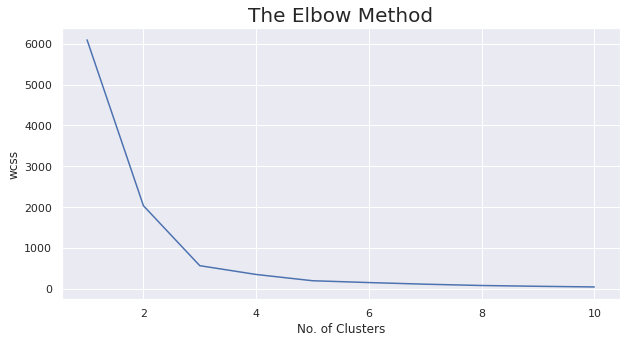

In [149]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    km.fit(X)
    wcss.append(km.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

As the elbow corner coincides with x=2, we will have to form 2 clusters. Now, we apply k-means algorithm

In [166]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
y_means = km.fit_predict(X)


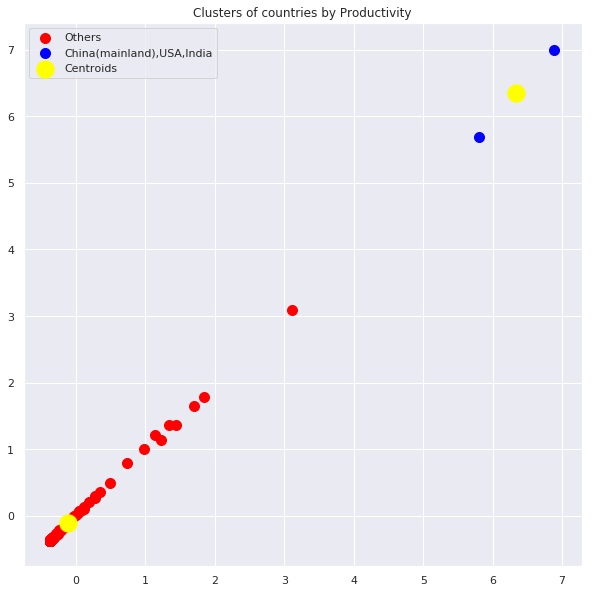

In [172]:
plt.figure(figsize=(10,10))

plt.scatter(X[y_means == 0, 0], X[y_means == 0,1],s=100,c='red',label='Others')
plt.scatter(X[y_means == 1, 0], X[y_means == 1,1],s=100,c='blue',label='China(mainland),USA,India')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of countries by Productivity')
plt.legend()
plt.show()

The blue cluster represents China(Mainland), USA and India while the red cluster represents all the other countries. This result was highly probable.  See how China, USA and India stand out. That has been observed here in clustering too.